# Broadly Identifying Range of Blocking Configurations and Parameters to Use for Sequential and LSH blocking techniques

In [1]:
# Navigate to current EDA directory as the relative path point
%pwd
%cd ../script/
from utilities import *

amz_g_seed = 420

amz_goog = Amazon_Google(seed = amz_g_seed, diff_sub_sample = 150, difficult_cutoff = 0.2, prop_train = 0.8)

c:\Users\seans\Documents\neural_entity_matching\script


## Sequential Blocking parameter exploration

Above graph gives us a sense of the distribution fo similarities between positive matches (blue) and negative matches (red)
We seek to find sensible regions to explore

* cutoff_distance

* Min shared tokens


Plot below is a sample of the Levenstein edit similarity between randomly matched negatives and true positives.

Look to calculate all pairwise similiarities is impossible and does not scale well.

First step is to decide on the `min shared tokens`. This is a very quick measure of generating broadly candidate pairs based off sharing a total of min_shared_tokens between them at LEAST in the title of the product.

This is used to throw out clearly non-duplicate pairs (for example sharing less than <=1 common tokens)

After that is done we apply a fine grained blocking to the severely reduced set produced by the attribute overlap method just described.

We need to determine at what cutoff_distance do we declare something as being a candidate pair. For that we look at samples like the graph below.

If we set the cutoff distance to 75, then all candidate pairs with Levenstein edit similarities of >=75 will be labelled as a potential match.

All candidate pairs with similarities below < 75 will be discarded.

General idea is rough method to generate some candidates then to finely comb over these candidates.


You need to choose: be agressive in initial screening or in the final screening.
Issue is if you are too lax in the initial screening, computationally you may be considering too many candidates.



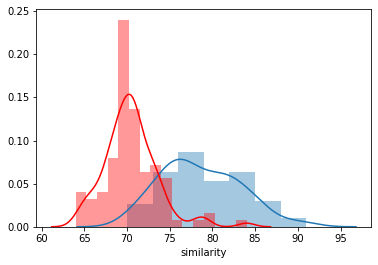

In [2]:
amz_goog.data.generate_distance_samples(100,100, True, False, 500)

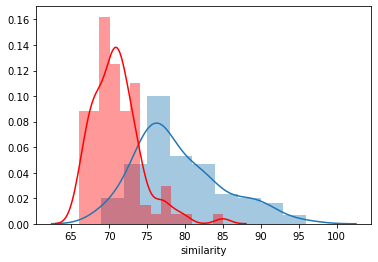

In [3]:
amz_goog.data.generate_distance_samples(100,100, True, False, 515161651)

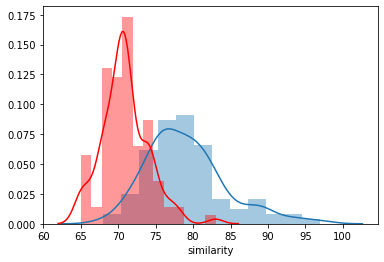

In [4]:
amz_goog.data.generate_distance_samples(100,100, True, False, 23232)

## LSH parameter exploration

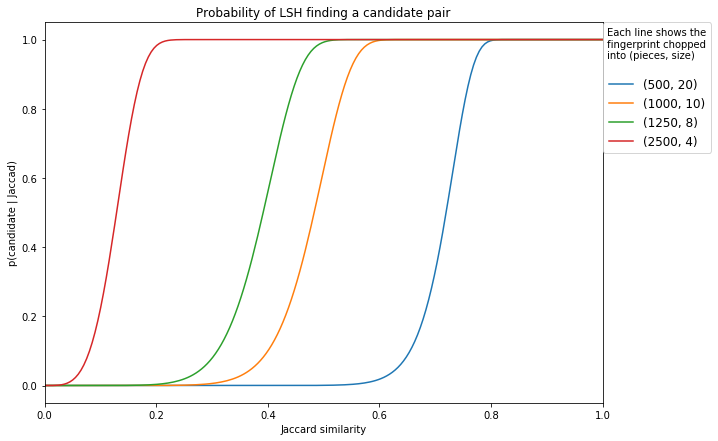

In [8]:
plot_lsh_candidate_prob([(2500,4),(1250,8),(1000,10),(500,20)],10000)

We can see from above how the number of buckets/pieces in which we split the keys interact with the size of the block.

* the greater the number of pieces, the more likely that LOWER Jaccard similarity tuples are placed in a candidate pair

* the lower the number of pieces, the higher the jaccard similarity needs to be between tuples for them to be placed as a candidate pair

* The greater the total fingerprint size, the less variance in the results and the better it approximates the true Jaccard distance. Remember LSH using MinHash is a clever way to AVOID all N^2 Jaccard similarity comparisons

